In [ ]:
# Open file and clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Stake Platform users Data - Turkey.csv')
#The columns REGISTRATION_DATE and DEPOSIT_DATE are of type Object, we need to convert them to datetime for further analysis.
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])
print(df.head().to_markdown(index = False, numalign = "left", stralign = "left"))

| IDCUSTOMER   | GENDER   | CITY    | COUNTRY   | FIRST_DEPOSIT_AMOUNT   | REGISTRATION_DATE   | DEPOSIT_DATE        |
|:-------------|:---------|:--------|:----------|:-----------------------|:--------------------|:--------------------|
| 5075649      | M        | ankara  | Turkey    | 100                    | 2009-01-10 00:00:00 | 2022-06-05 00:00:00 |
| 5176235      | M        | elazığ  | Turkey    | 400                    | 2009-03-01 00:00:00 | 2022-02-11 00:00:00 |
| 5249140      | M        | izmir   | Turkey    | 200                    | 2009-04-06 00:00:00 | 2022-05-02 00:00:00 |
| 5300998      | M        | Üsküdar | Turkey    | 100                    | 2009-05-02 00:00:00 | 2022-02-11 00:00:00 |
| 5371454      | M        | sakarya | Turkey    | 880                    | 2009-06-07 00:00:00 | 2022-05-29 00:00:00 |


In [5]:
# Descriptive Statistics of the dataframe

In [17]:
stats = df.describe()
print(stats)

         IDCUSTOMER  FIRST_DEPOSIT_AMOUNT              REGISTRATION_DATE  \
count  2.206500e+04          22065.000000                          22065   
mean   1.380593e+08            284.806530  2022-01-20 00:15:59.347382784   
min    5.075649e+06              0.380000            2009-01-10 00:00:00   
25%    1.459097e+08             70.000000            2022-02-11 00:00:00   
50%    1.465139e+08            100.000000            2022-04-05 00:00:00   
75%    1.471483e+08            250.000000            2022-06-07 00:00:00   
max    1.478480e+08         100000.000000            2022-08-31 00:00:00   
std    3.272693e+07            943.993064                            NaN   

                        DEPOSIT_DATE  Customer Lifetime  
count                          22065       22065.000000  
mean   2022-04-21 08:52:32.141400576          91.358713  
min              2022-01-01 00:00:00           0.000000  
25%              2022-02-26 00:00:00           0.000000  
50%              2022-04-

In [ ]:
#Find the city and country with the highest number of unique customers.

In [7]:
grouped_data = df.groupby(['CITY', 'COUNTRY'])['IDCUSTOMER'].nunique().to_frame()
grouped_data = grouped_data.sort_values(by = 'IDCUSTOMER', ascending = False)

result = grouped_data.reset_index()
result = result.rename(columns = {'IDCUSTOMER': 'Unique Customers Count'})

print(result.head(1).to_markdown(index = False, numalign="left", stralign="left"))

| CITY     | COUNTRY   | Unique Customers Count   |
|:---------|:----------|:-------------------------|
| İstanbul | Turkey    | 4770                     |


In [ ]:
#Find the unique count of players in each city.

In [9]:
country_counts = df.groupby('CITY')['IDCUSTOMER'].nunique()
country_counts = country_counts.sort_values(ascending=False).reset_index()
country_counts = country_counts.rename(columns={'IDCUSTOMER': 'Unique Player Count'})

print("Unique count of players in each country(descending order):\n")
print(country_counts.to_markdown(index=False, numalign='left', stralign="left"))

Unique count of players in each country(descending order):

| CITY                                             | Unique Player Count   |
|:-------------------------------------------------|:----------------------|
| İstanbul                                         | 4770                  |
| Bursa                                            | 1652                  |
| Diyarbakır                                       | 1307                  |
| Ankara                                           | 1182                  |
| İzmir                                            | 1151                  |
| Antalya                                          | 789                   |
| Adana                                            | 676                   |
| Kocaeli                                          | 635                   |
| Gaziantep                                        | 576                   |
| Tekirdağ                                         | 370                   |
| Kayseri       

In [ ]:
#Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime'.

In [15]:
df['Customer Lifetime'] = (df['DEPOSIT_DATE'] - df['REGISTRATION_DATE']).dt.days
customer_lifetime = df[['IDCUSTOMER','Customer Lifetime']]
print(customer_lifetime.to_markdown(index=False, numalign='left', stralign="left"))

| IDCUSTOMER   | Customer Lifetime   |
|:-------------|:--------------------|
| 5.07565e+06  | 4894                |
| 5.17624e+06  | 4730                |
| 5.24914e+06  | 4774                |
| 5.301e+06    | 4668                |
| 5.37145e+06  | 4739                |
| 5.63664e+06  | 4520                |
| 5.67035e+06  | 4509                |
| 5.73139e+06  | 4478                |
| 5.769e+06    | 4585                |
| 5.84061e+06  | 4553                |
| 5.87119e+06  | 4431                |
| 5.92889e+06  | 4376                |
| 5.95646e+06  | 4367                |
| 6.08946e+06  | 4343                |
| 6.30816e+06  | 4171                |
| 6.31264e+06  | 4212                |
| 6.31449e+06  | 4297                |
| 6.46126e+06  | 4170                |
| 6.5348e+06   | 4148                |
| 6.539e+06    | 4073                |
| 6.55548e+06  | 4088                |
| 6.59914e+06  | 4100                |
| 6.61234e+06  | 4179                |
| 6.65618e+06  | 4063    

In [ ]:
#Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count).

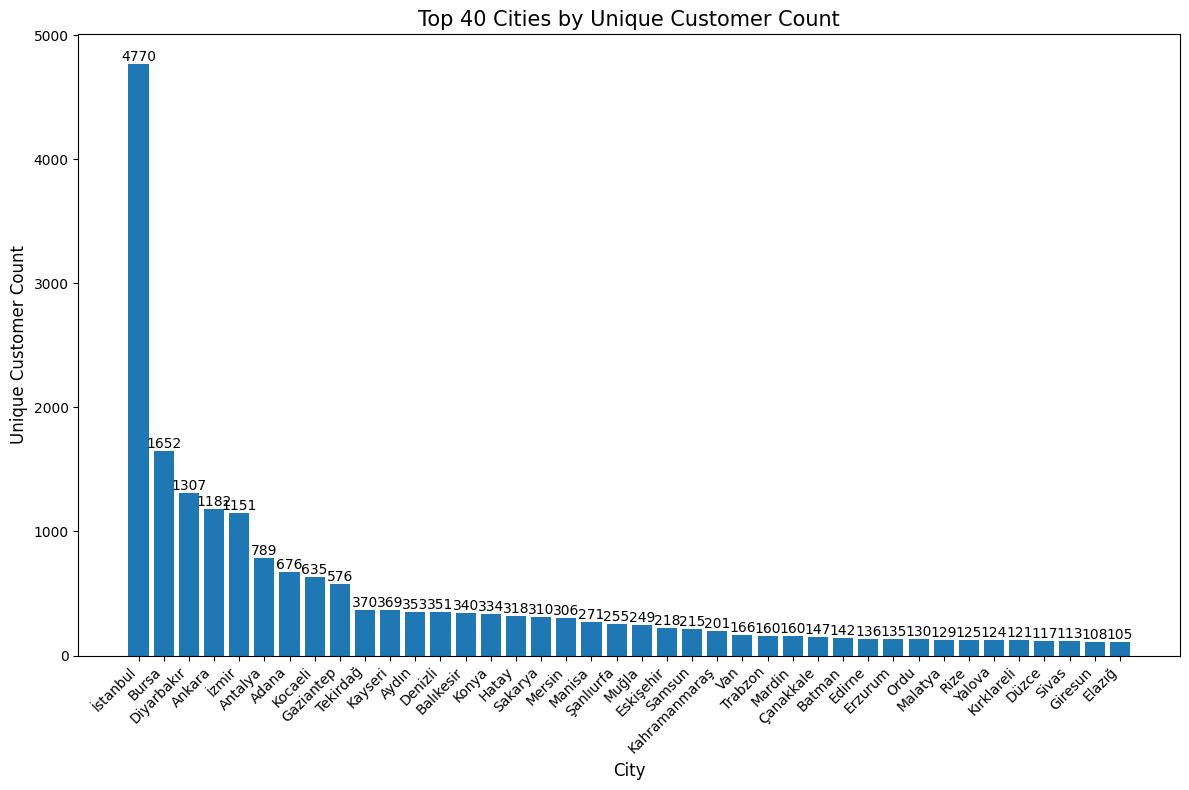

In [18]:
top_40_cities = df.groupby("CITY")["IDCUSTOMER"].nunique().sort_values(ascending=False).head(40)
x_values = top_40_cities.index.to_list()

plt.figure(figsize=(12,8))
bars = plt.bar(x_values, top_40_cities.values)
plt.xlabel('City', fontsize=12)
plt.ylabel('Unique Customer Count', fontsize=12)
plt.title('Top 40 Cities by Unique Customer Count', fontsize=15)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month).

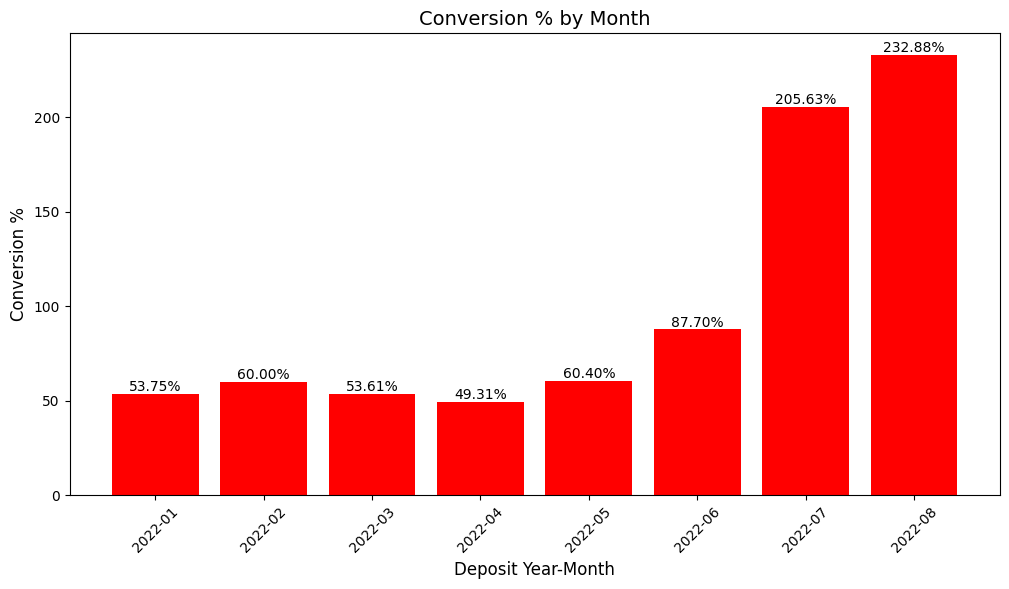

In [19]:
df['DEPOSIT_YEAR_MONTH'] = df['DEPOSIT_DATE'].dt.to_period('M')
unique_first_deposits_per_month = df.groupby('DEPOSIT_YEAR_MONTH')['FIRST_DEPOSIT_AMOUNT'].nunique()
unique_registrations_per_month = df.groupby('DEPOSIT_YEAR_MONTH')['REGISTRATION_DATE'].nunique()
conversion_percentage = (unique_first_deposits_per_month / unique_registrations_per_month) * 100

conversion_df = pd.DataFrame({'Conversion %': conversion_percentage})
conversion_df.index = conversion_df.index.astype(str)

plt.figure(figsize=(12,6))
bars = plt.bar(conversion_df.index, conversion_df['Conversion %'], color = 'red')
plt.xlabel('Deposit Year-Month', fontsize = 12)
plt.ylabel('Conversion %', fontsize = 12)
plt.title('Conversion % by Month', fontsize=14)
plt.xticks(rotation = 45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha = 'center', va = 'bottom')

In [ ]:
## End of Project